In [47]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
import scipy.io as io
import time

from scipy.interpolate import CubicSpline

plt.rc("font", family=["Times New Roman"]) #skifter skrifttype
plt.rc("axes", labelsize=18)   #skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=16, direction="out")  #skriftstørrelse af ticks og viser ticks øverst
plt.rc("ytick", labelsize=16, direction="out")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=16)

In [48]:
path = r"../Polarization filter/"
path_no1 = r"No1/MatLab/"
path_no2 = r"No2/MatLab/"

def get_data(entries):
    data = io.loadmat(path + entries)
        
    length = data.get("Length")[0][0]
    Tinterval = data.get("Tinterval")[0][0]
    Tstart = data.get("Tstart")[0][0]
    
    t = np.arange(Tstart, Tinterval*length, Tinterval)
    V = np.transpose(data.get("A"))[0]
    
    return t, V


In [49]:
def degree_V(folder, file) : 
    offset = 9
    
    entry = str (folder) + str (file)
    
    t, V = get_data(entry)
    tname = file.split('.')[0]
    theta = int(tname) - 9 
    
    Vmax = np.max(V)
    Vmin = np.min(V)
    Vdiff = Vmax-Vmin
    var = np.var(V)
    
    return theta, Vdiff, var
    
    

In [50]:
files_no1 = os.listdir(path+path_no1)
files_no2 = os.listdir(path+path_no2)


4.2687125 6.134966
7.5369096 1.4019439
4.8019624
(0, 6.134966, 4.2687125)


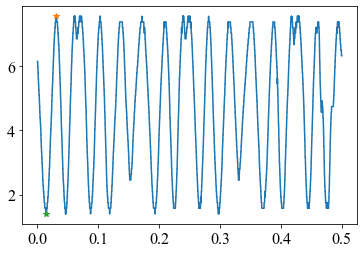

In [51]:
t, V = get_data(path_no1 + r"9.mat")

plt.plot(t, V, '-')

maxval = np.argmax(V)
minval = np.argmin(V)

for i in [maxval, minval] : 
    plt.plot(t[i], V[i], '*')

print(np.var(V), V[maxval]-V[minval])

print(V[maxval], V[minval])
print(np.mean(V))

print(degree_V(path_no1, r"9.mat"))

Text(0.5, 0, 'Theta')

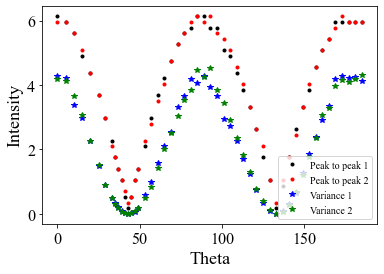

In [52]:
th1 = []
pp1 = []
var1 = []

th2 = []
pp2 = []
var2 = []

th = []
pp = []
var = []

for file1, file2 in zip(files_no1, files_no2) : 
    t, p, v = degree_V(path_no1, file1)
    t1, p1, v1 = degree_V(path_no2, file2)
    
    th1.append(t)
    pp1.append(p)
    var1.append(v)
    
    th2.append(t1)
    pp2.append(p1)
    var2.append(v1)
    
    th.append((t+t1)/2)
    pp.append((p+p1)/2)
    var.append((v+v1)/2)


plt.plot(th1, pp1, 'k.', label = 'Peak to peak 1')
plt.plot(th2, pp2, 'r.', label= 'Peak to peak 2')
plt.plot(th1, var1, 'b*', label='Variance 1')
plt.plot(th2, var2, 'g*', label='Variance 2')

plt.legend(prop={'size':10}, loc = 'lower right')

plt.ylabel('Intensity')
plt.xlabel('Theta')

#plt.plot(th, var, '*')
    



[2.13244444]


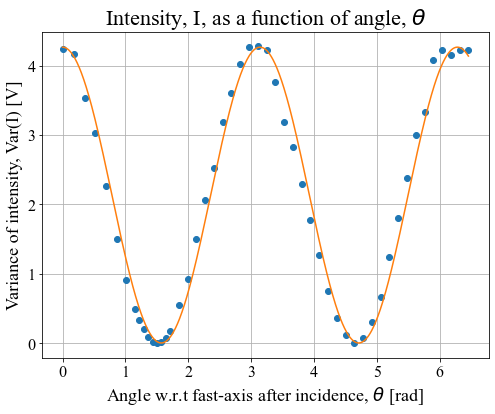

In [53]:
def sine(theta, *p) : 
    A = p[0]
    return A*(1+np.cos(2*theta))

fig, ax = plt.subplots(figsize=(8,6))

ax.set_title(r"Intensity, I, as a function of angle, $\theta$", pad = 4)
ax.set_ylabel(r"Variance of intensity, Var(I) [V]")
ax.set_xlabel(r"Angle w.r.t fast-axis after incidence, $ \theta $ [rad]")

th_new = np.radians(th)*2

popt, pcov = curve_fit(sine, th_new, var, p0=[1])

th_fit = np.linspace(np.min(th_new), np.max(th_new), 1000)
var_fit = sine(th_fit, *popt)

print(popt)
plt.plot(th_new, var, 'o')
plt.plot(th_fit, var_fit)

ax.grid()

In [56]:
file1 = open('data.txt', 'w')
for th, v in zip(th_new, var) : 
    file1.write("{} \t {} \n".format(th, v))

file1.close()
